In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
traffic_df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

traffic_df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic_df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [4]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Check for missing values

In [5]:
traffic_df.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [6]:
traffic_df['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

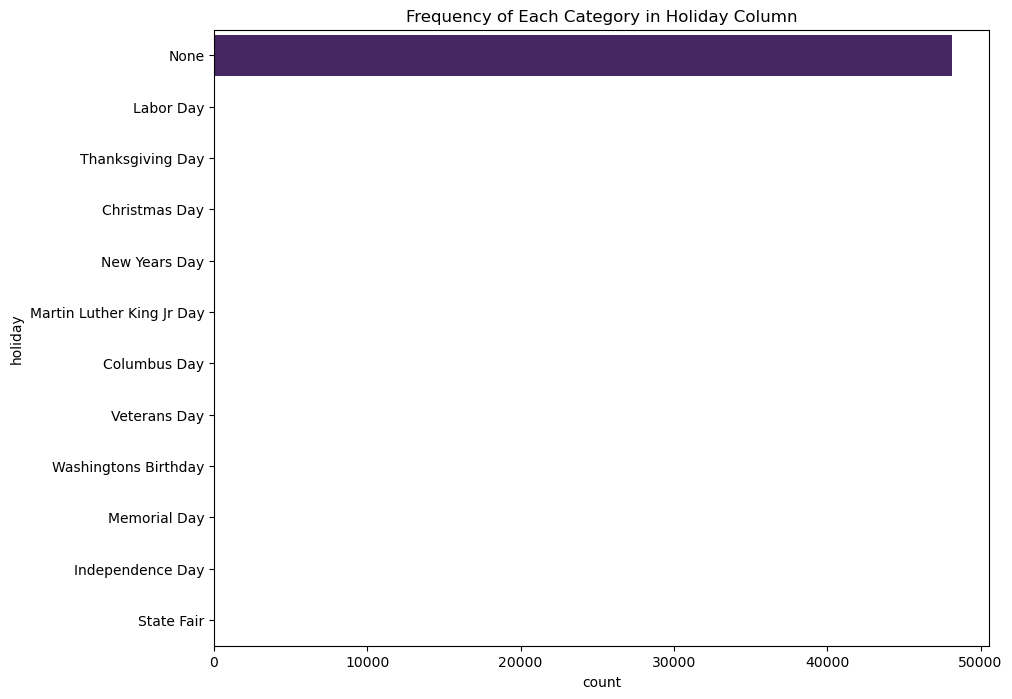

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


traffic_df['holiday'].fillna('None', inplace=True)

# Plotting frequency of each category in the 'holiday' column
plt.figure(figsize=(10, 8))
sns.countplot(y='holiday', data=traffic_df, order=traffic_df['holiday'].value_counts().index, palette='viridis')
plt.title('Frequency of Each Category in Holiday Column')
plt.show()


In [8]:
traffic_df.holiday.value_counts()

holiday
None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: count, dtype: int64

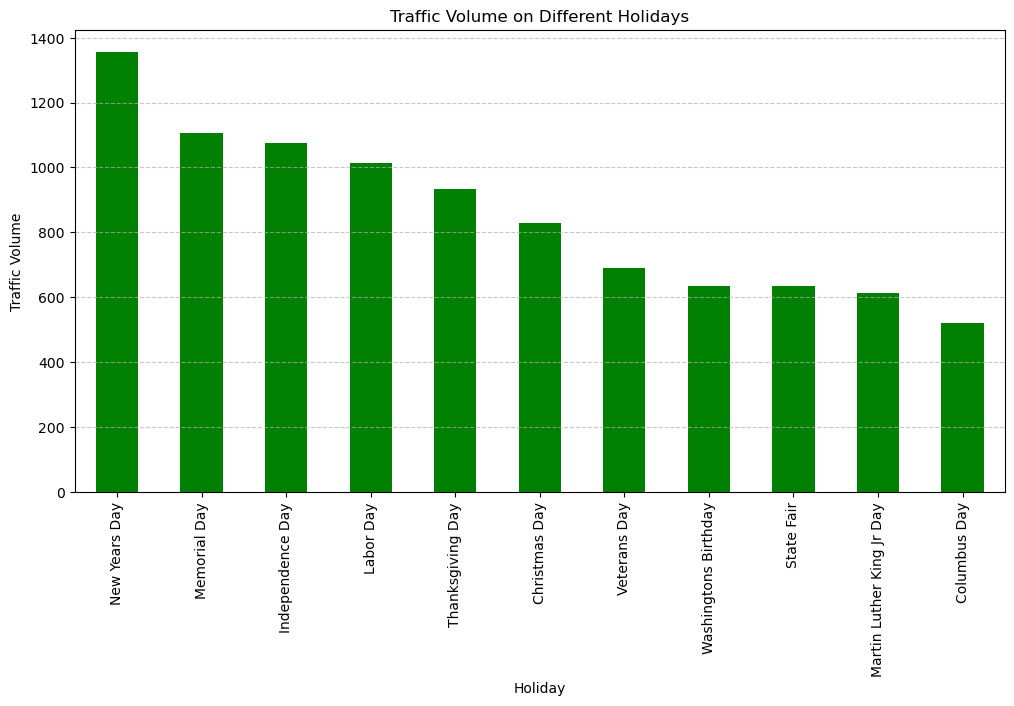

In [9]:
# Filter out rows where holiday is 'None'
holidays = traffic_df.loc[traffic_df.holiday != 'None']

# Plot the mean traffic volume on different holidays excluding 'None'
plt.figure(figsize=(12, 6))
df_holidays = holidays.groupby('holiday')['traffic_volume'].mean().sort_values(ascending=False)
df_holidays.plot(kind='bar', color='green')
plt.title('Traffic Volume on Different Holidays')
plt.xlabel('Holiday')
plt.ylabel('Traffic Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
print("max date :" +traffic_df.date_time.max())
print("min date :" +traffic_df.date_time.min())

max date :2018-09-30 23:00:00
min date :2012-10-02 09:00:00


# Hours and Day of the week from Date type

In [11]:
traffic_df['date_time'] = pd.to_datetime(traffic_df['date_time'])
traffic_df['year'] = traffic_df['date_time'].dt.year
traffic_df['month'] = traffic_df['date_time'].dt.month
traffic_df['day'] = traffic_df['date_time'].dt.day
traffic_df['hour'] = traffic_df['date_time'].dt.hour
traffic_df['dow'] = traffic_df['date_time'].dt.dayofweek

traffic_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,hour,dow
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,2,9,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,2,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,2,11,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,2,12,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,2018,9,30,19,6
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018,9,30,20,6
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018,9,30,21,6
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018,9,30,22,6


# Convert string to float: 'Clouds‘

In [12]:
unique_weather_main = traffic_df['weather_main'].unique()
print(unique_weather_main)


['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']


In [13]:
# def convert_clouds_to_float(value):
#     if value == 'Clouds':
#         return 1.0
#     return value

# traffic_df['weather_main'] = traffic_df['weather_main'].apply(convert_clouds_to_float)

In [14]:
traffic_df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

# Data Preparation

# Convert Kelvin to Celsius

In [15]:
ndf = traffic_df

In [16]:
ndf['temp'] = (ndf['temp']-273.15)
ndf

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,hour,dow
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,2,9,1
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,2,10,1
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,2,11,1
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,2,12,1
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,2018,9,30,19,6
48200,None,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018,9,30,20,6
48201,None,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018,9,30,21,6
48202,None,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018,9,30,22,6


In [17]:
ndf = ndf.loc[ndf.temp > -250]
ndf

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,hour,dow
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,2,9,1
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,2,10,1
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,2,11,1
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,2,12,1
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,2018,9,30,19,6
48200,None,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018,9,30,20,6
48201,None,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018,9,30,21,6
48202,None,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018,9,30,22,6


In [18]:
# ndf = ndf.sort_values(['temp'], ascending=True)
# ndf

# Outlier Detection - Kurtosis

Kurtosis is a statistical measure of skew within a distribution. A higher kurtosis value is linked to the possibility of outliers. We will use kurtosis to find outliers in our numerical columns:

In [19]:
ndf.kurt(numeric_only = True)

temp                 -0.658520
rain_1h           48145.637010
snow_1h            2619.921358
clouds_all           -1.742015
traffic_volume       -1.308881
year                 -1.201539
month                -1.143161
day                  -1.181648
hour                 -1.210087
dow                  -1.254784
dtype: float64

In [20]:
ndf['rain_1h'].max()

9831.3

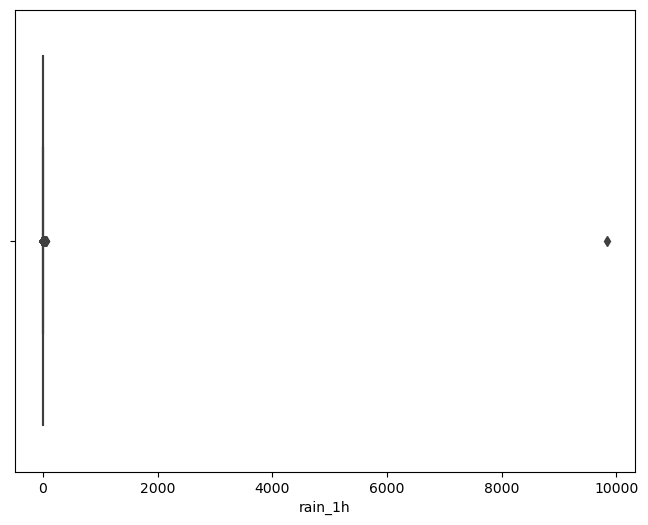

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='rain_1h', data=ndf)
plt.show()

<Axes: xlabel='rain_1h'>

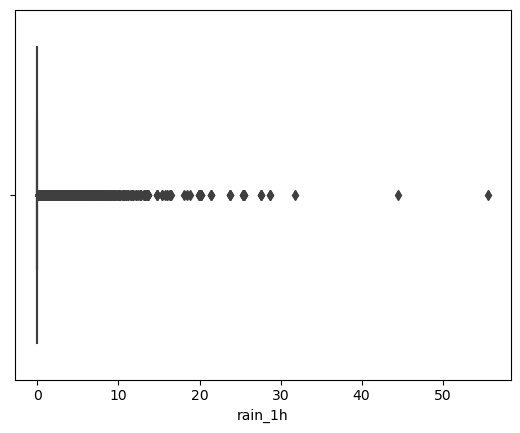

In [22]:
sns.boxplot(x='rain_1h', data=ndf.loc[ndf['rain_1h'] < 2000])

In [23]:
ndf = ndf.loc[ndf.rain_1h<2000]
#ndf = ndf.loc[ndf.rain_1h>0]
ndf

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,hour,dow
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,2,9,1
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,2,10,1
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,2,11,1
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,2,12,1
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,2018,9,30,19,6
48200,None,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018,9,30,20,6
48201,None,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018,9,30,21,6
48202,None,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018,9,30,22,6


In [24]:
ndf.kurt(numeric_only = True)

temp                -0.658507
rain_1h            521.343361
snow_1h           2619.866910
clouds_all          -1.742033
traffic_volume      -1.308869
year                -1.201578
month               -1.143198
day                 -1.181666
hour                -1.210082
dow                 -1.254762
dtype: float64

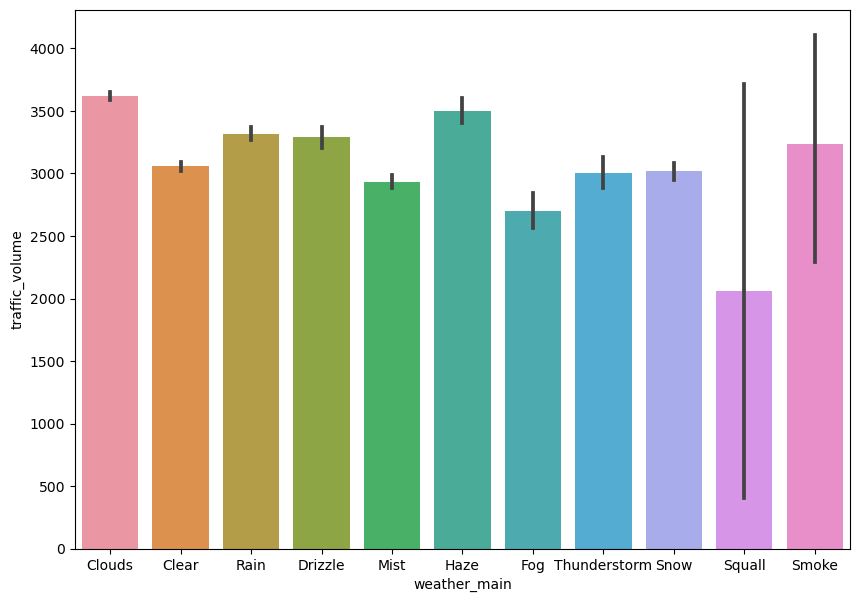

In [25]:
#Plotting weather_main over traffic volume
plt.figure(figsize=(10,7))
sns.barplot(x='weather_main', y = 'traffic_volume', data = ndf)
plt.show()

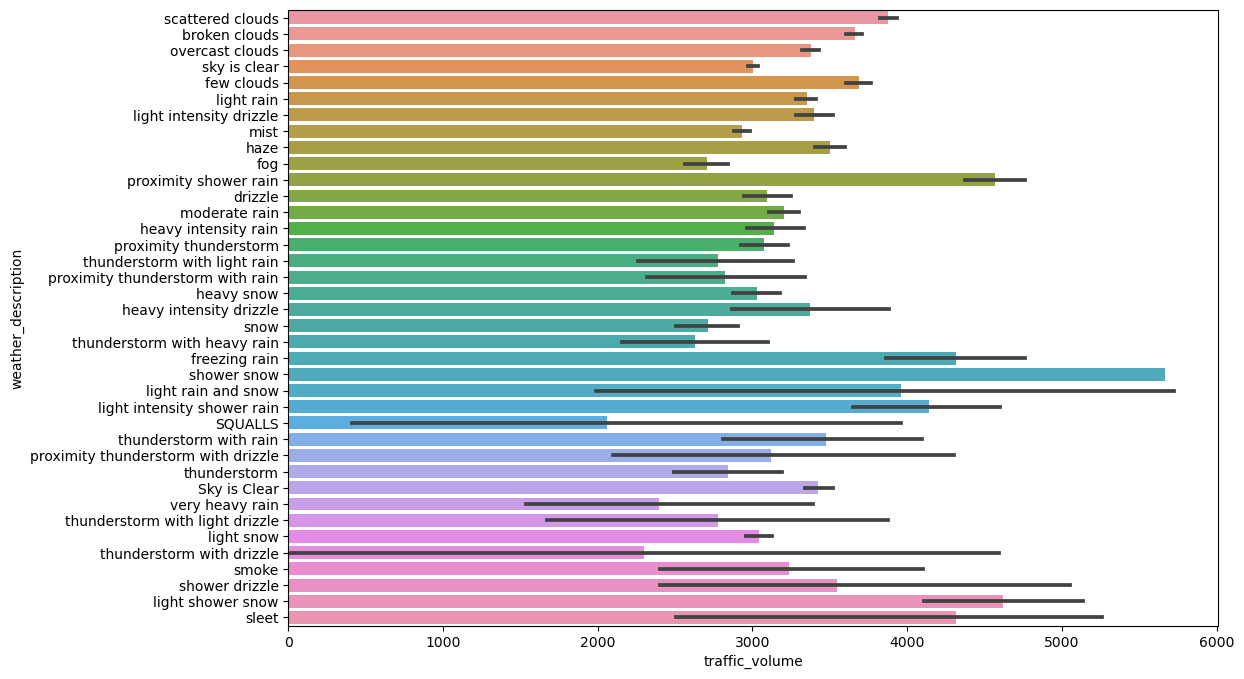

In [26]:
#Plotting weather_description over traffic volume
plt.figure(figsize=(12,8))
sns.barplot(y='weather_description', x = 'traffic_volume', data = ndf)
plt.show()

# Interaction Between 'Weather Main & Description'

In [27]:
ndf['weather_description'] = ndf['weather_description'].map(lambda x: x.lower())

In [28]:
ndf.groupby(['weather_main','weather_description']).aggregate({'hour':'count','traffic_volume':'mean'}).reset_index().style.background_gradient(cmap='Reds')

,weather_main,weather_description,hour,traffic_volume
0,Clear,sky is clear,13381,3057.207458
1,Clouds,broken clouds,4666,3661.142092
2,Clouds,few clouds,1956,3691.453476
3,Clouds,overcast clouds,5081,3375.963590
4,Clouds,scattered clouds,3461,3875.622363
5,Drizzle,drizzle,651,3094.858679
6,Drizzle,heavy intensity drizzle,64,3371.109375
7,Drizzle,light intensity drizzle,1100,3400.567273
8,Drizzle,shower drizzle,6,3547.666667
9,Fog,fog,912,2703.720395


In [29]:
ndf

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,hour,dow
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,2,9,1
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,2,10,1
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,2,11,1
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,2,12,1
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,2018,9,30,19,6
48200,None,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018,9,30,20,6
48201,None,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018,9,30,21,6
48202,None,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018,9,30,22,6


# OneHotEncoding Categorical Data

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
odf = ndf
ndf['holi'] = np.where(ndf['holiday'] == 'None',0,1)

In [32]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

X = ndf[['weather_main']]
ohe.fit(X)
X_ohe = ohe.transform(X)

# Display the encoded data
print('Weather encoded: {}'.format(X_ohe[:5]))
print("X_ohe.shape\n", X_ohe.shape)

# Get feature names and create a new DataFrame for one-hot encoded features
feature_names = X.columns.to_list()
encoded_names = ohe.get_feature_names_out(feature_names)
X_ohe = pd.DataFrame(X_ohe, columns=encoded_names)
print("Feature Names 'weather_main'\n", X_ohe[:5])

# Create a new DataFrame with one-hot encoded features
ndf = ndf.drop(['weather_main'], axis=1)
ndf = pd.concat([ndf.reset_index(drop=True), X_ohe], axis=1)


Weather encoded: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
X_ohe.shape
 (48193, 11)
Feature Names 'weather_main'
    weather_main_Clear  weather_main_Clouds  weather_main_Drizzle  \
0                 0.0                  1.0                   0.0   
1                 0.0                  1.0                   0.0   
2                 0.0                  1.0                   0.0   
3                 0.0                  1.0                   0.0   
4                 0.0                  1.0                   0.0   

   weather_main_Fog  weather_main_Haze  weather_main_Mist  weather_main_Rain  \
0               0.0                0.0                0.0                0.0   
1               0.0                0.0                0.0                0.0   
2               0.0                0.0                0.0                0.0   
3               0.

In [33]:
odf = ndf.drop(['holi', 'weather_description', 'date_time'], axis=1)
ndf = ndf.drop(['holiday', 'weather_description', 'date_time'], axis=1)
ndf.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'year',
       'month', 'day', 'hour', 'dow', 'holi', 'weather_main_Clear',
       'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog',
       'weather_main_Haze', 'weather_main_Mist', 'weather_main_Rain',
       'weather_main_Smoke', 'weather_main_Snow', 'weather_main_Squall',
       'weather_main_Thunderstorm'],
      dtype='object')

In [34]:
odf.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume',
       'year', 'month', 'day', 'hour', 'dow', 'weather_main_Clear',
       'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog',
       'weather_main_Haze', 'weather_main_Mist', 'weather_main_Rain',
       'weather_main_Smoke', 'weather_main_Snow', 'weather_main_Squall',
       'weather_main_Thunderstorm'],
      dtype='object')

In [35]:
corr = ndf.corr()
print(abs(corr['traffic_volume'].sort_values(ascending=False)))

traffic_volume               1.000000
hour                         0.352277
temp                         0.132258
weather_main_Clouds          0.122190
clouds_all                   0.066804
weather_main_Haze            0.020751
weather_main_Rain            0.010540
year                         0.004586
weather_main_Drizzle         0.003047
snow_1h                      0.000729
weather_main_Smoke           0.000231
month                        0.002819
weather_main_Squall          0.005496
day                          0.007750
weather_main_Thunderstorm    0.019270
rain_1h                      0.022382
weather_main_Snow            0.030855
weather_main_Fog             0.038899
holi                         0.042911
weather_main_Mist            0.061813
weather_main_Clear           0.063338
dow                          0.149299
Name: traffic_volume, dtype: float64


# Model Train

In [36]:
ndf

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,year,month,day,hour,dow,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,15.13,0.0,0.0,40,5545,2012,10,2,9,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.21,0.0,0.0,75,4516,2012,10,2,10,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.43,0.0,0.0,90,4767,2012,10,2,11,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.98,0.0,0.0,90,5026,2012,10,2,12,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.99,0.0,0.0,75,4918,2012,10,2,13,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48188,10.30,0.0,0.0,75,3543,2018,9,30,19,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48189,9.61,0.0,0.0,90,2781,2018,9,30,20,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48190,9.58,0.0,0.0,90,2159,2018,9,30,21,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48191,8.94,0.0,0.0,90,1450,2018,9,30,22,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
ndf.dtypes

temp                         float64
rain_1h                      float64
snow_1h                      float64
clouds_all                     int64
traffic_volume                 int64
year                           int32
month                          int32
day                            int32
hour                           int32
dow                            int32
holi                           int64
weather_main_Clear           float64
weather_main_Clouds          float64
weather_main_Drizzle         float64
weather_main_Fog             float64
weather_main_Haze            float64
weather_main_Mist            float64
weather_main_Rain            float64
weather_main_Smoke           float64
weather_main_Snow            float64
weather_main_Squall          float64
weather_main_Thunderstorm    float64
dtype: object

In [38]:
# # Here, standardizing 'temp', 'rain_1h', 'snow_1h', and 'clouds_all'

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# ndf[['temp', 'rain_1h', 'snow_1h', 'clouds_all']] = scaler.fit_transform(ndf[['temp', 'rain_1h', 'snow_1h', 'clouds_all']])

# Model using XGBRegressor

In [39]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from xgboost import XGBRegressor

# X = ndf.drop(['traffic_volume', 'date_time' ], axis=1)
# y = ndf.traffic_volume
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle = True)
# model = XGBRegressor(n_estimators=600, learning_rate=0.3, max_depth=5)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred)

# mse = mean_squared_error(y_test, y_pred)

# rmse = mean_squared_error(y_test, y_pred, squared=False)

# r2 = r2_score(y_test, y_pred)

# print(f"Mean Absolute Error (MAE) {mae}")
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"R^2: {r2}")

# Model using RandomForestRegressor

In [40]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

# X = ndf.drop(['traffic_volume'], axis=1)
# y = ndf['traffic_volume']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

# # Initialize the model (Random Forest Regressor in this case)
# model = RandomForestRegressor(n_estimators=600, random_state=42)

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# r2 = r2_score(y_test, y_pred)

# # Print the results
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"R^2: {r2}")

# Question 3

In [41]:
ndf['datetime'] = pd.to_datetime(ndf[['year', 'month', 'day', 'hour']])

# Calculate the difference in hours from the minimum datetime value
ndf['hour_continuous'] = (ndf['datetime'] - ndf['datetime'].min()).dt.total_seconds() / 3600

# Convert the result to integers to get a continuous hour column starting from 0
ndf['hour_continuous'] = ndf['hour_continuous'].astype(int)

ndf = ndf.drop(columns=['datetime'])

ndf = ndf.sort_values(by='hour_continuous')

In [42]:
ndf = ndf.sort_values(by='hour_continuous')
pd.set_option('display.max_columns', None)
display(ndf)
print(ndf['hour_continuous'].max)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,year,month,day,hour,dow,holi,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,hour_continuous
0,15.13,0.0,0.0,40,5545,2012,10,2,9,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,16.21,0.0,0.0,75,4516,2012,10,2,10,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,16.43,0.0,0.0,90,4767,2012,10,2,11,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,16.98,0.0,0.0,90,5026,2012,10,2,12,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,17.99,0.0,0.0,75,4918,2012,10,2,13,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48188,10.30,0.0,0.0,75,3543,2018,9,30,19,6,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52546
48189,9.61,0.0,0.0,90,2781,2018,9,30,20,6,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52547
48190,9.58,0.0,0.0,90,2159,2018,9,30,21,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,52548
48191,8.94,0.0,0.0,90,1450,2018,9,30,22,6,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52549


<bound method Series.max of 0            0
1            1
2            2
3            3
4            4
         ...  
48188    52546
48189    52547
48190    52548
48191    52549
48192    52550
Name: hour_continuous, Length: 48193, dtype: int64>


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# X = ndf[['hour']]  # Extracting the 'hour' column
X = ndf.drop(['traffic_volume'], axis=1)
y = ndf['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=42)

In [44]:


# Train a RandomForestRegressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get predictions on the test set
y_pred = rf_model.predict(X_test)

# Scale the predictions to the original range of traffic volume
# scaler = MinMaxScaler()
# y_pred_scaled = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Plot the visualization


In [45]:
Scaler = MinMaxScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.fit_transform(X_test)

rf_model.fit(X_train_scaled, y_train)

y_pred_scaled = rf_model.predict(X_test_scaled)

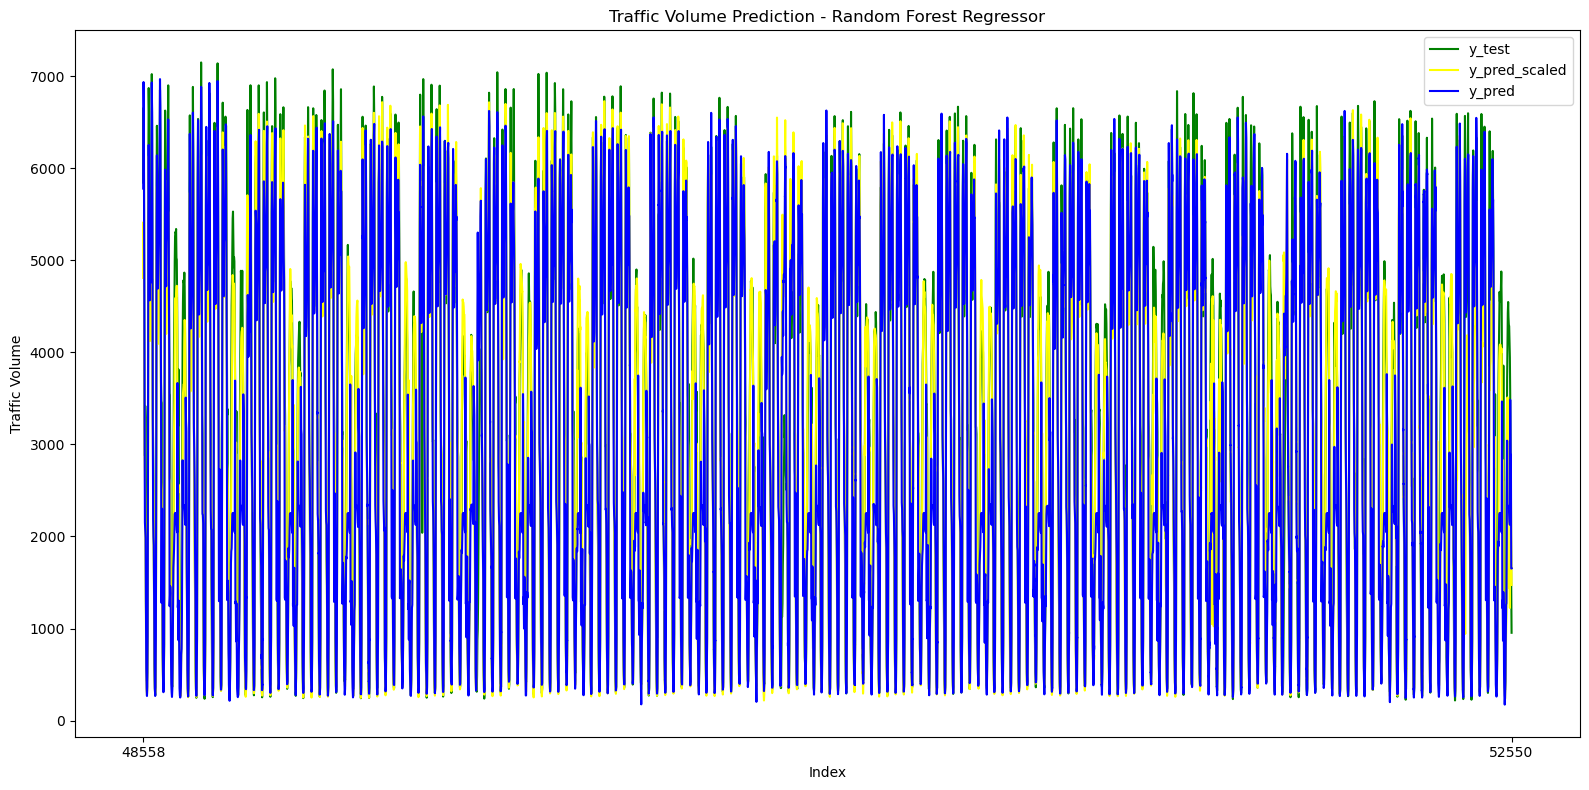

In [46]:
plt.figure(figsize=(16, 8))  # Adjust the figure size

# Plot y_test in green
plt.plot(X_test['hour_continuous'], y_test.values, color='green', label='y_test', linestyle='-')

# Plot y_pred_scaled in yellow
plt.plot(X_test['hour_continuous'], y_pred_scaled, color='yellow', label='y_pred_scaled', linestyle='-')
plt.plot()
# Plot y_pred in blue
plt.plot(X_test['hour_continuous'], y_pred, color='blue', label='y_pred', linestyle='-')

# Customize the plot
plt.title('Traffic Volume Prediction - Random Forest Regressor')
plt.xlabel('Index')
plt.ylabel('Traffic Volume')

# Set x-axis ticks at intervals of 200, 400, 800, and 1000
plt.xticks([X_test['hour_continuous'].min(),X_test['hour_continuous'].max()])

plt.legend()
plt.tight_layout()
plt.show()


# Question 4

In [47]:
weekend_df = odf[['hour', 'dow', 'holiday', 'traffic_volume']].copy()

In [48]:
weekend_df['type_of_day'] = np.where(weekend_df.holiday != 'None', 'Holiday',
                                      np.where(weekend_df.dow >= 5, 'Weekend', 'Weekday'))

In [49]:
odf1 = odf

In [50]:
odf1['type_of_day'] = np.where(weekend_df.holiday != 'None', 'Holiday',
                                      np.where(weekend_df.dow >= 5, 'Weekend', 'Weekday'))

In [51]:
weekend_df

,hour,dow,holiday,traffic_volume,type_of_day
0,9,1,None,5545,Weekday
1,10,1,None,4516,Weekday
2,11,1,None,4767,Weekday
3,12,1,None,5026,Weekday
4,13,1,None,4918,Weekday
...,...,...,...,...,...
48188,19,6,None,3543,Weekend
48189,20,6,None,2781,Weekend
48190,21,6,None,2159,Weekend
48191,22,6,None,1450,Weekend


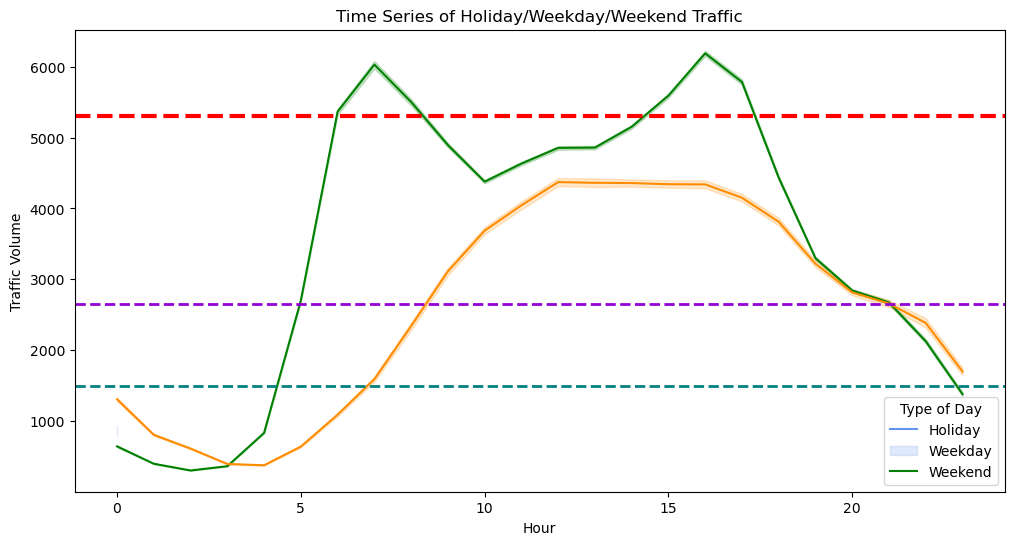

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the order of categories explicitly
day_order = ['Holiday', 'Weekday', 'Weekend']

# Plotting time series graph using Seaborn
plt.figure(figsize=(12, 6))

# Filter data for each type of day
holiday_data = weekend_df[weekend_df['type_of_day'] == 'Holiday']
weekday_data = weekend_df[weekend_df['type_of_day'] == 'Weekday']
weekend_data = weekend_df[weekend_df['type_of_day'] == 'Weekend']

# Plotting time series for each type of day
sns.lineplot(data=holiday_data, x='hour', y='traffic_volume', label='Holiday', color='cornflowerblue')
sns.lineplot(data=weekday_data, x='hour', y='traffic_volume', label='Weekday', color='green')
sns.lineplot(data=weekend_data, x='hour', y='traffic_volume', label='Weekend', color='darkorange')

# Adding horizontal lines
plt.axhline(y=5300, linewidth=3, color='red', linestyle='--', label='Threshold 1')
plt.axhline(y=2650, linewidth=2, color='darkviolet', linestyle='--', label='Threshold 2')
plt.axhline(y=1500, linewidth=2, color='teal', linestyle='--', label='Threshold 3')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Time Series of Holiday/Weekday/Weekend Traffic')

# Set the order of categories on the legend
plt.legend(title='Type of Day', labels=day_order)

# Show the plot
plt.show()


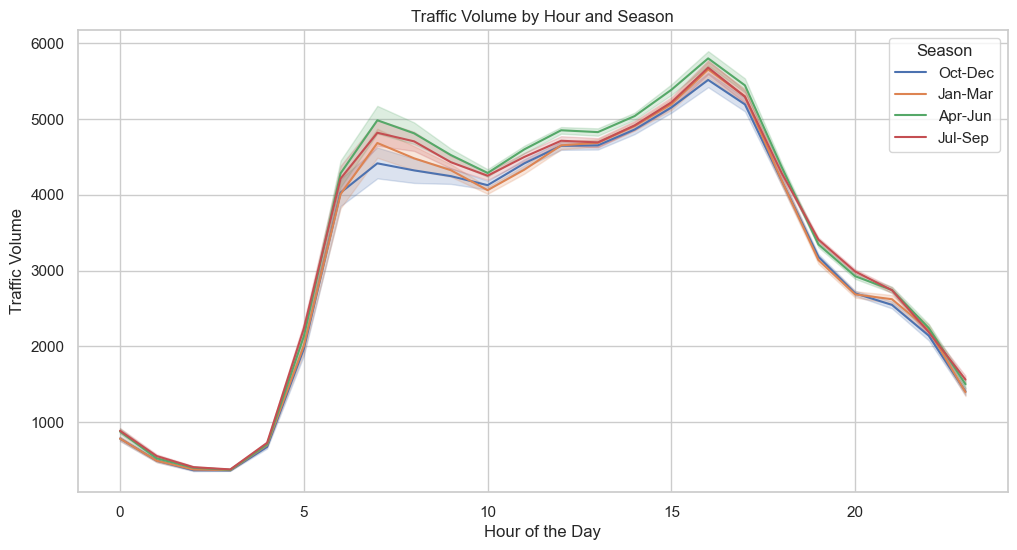

In [53]:
# Create a new column 'season' based on the month
odf['season'] = odf['month'].apply(lambda x: 'Jan-Mar' if 1 <= x <= 3 else ('Apr-Jun' if 4 <= x <= 6 else ('Jul-Sep' if 7 <= x <= 9 else 'Oct-Dec')))

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='traffic_volume', hue='season', data=odf)

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Hour and Season')

# Show the legend
plt.legend(title='Season')

# Show the plot
plt.show()

<Figure size 2000x1000 with 0 Axes>

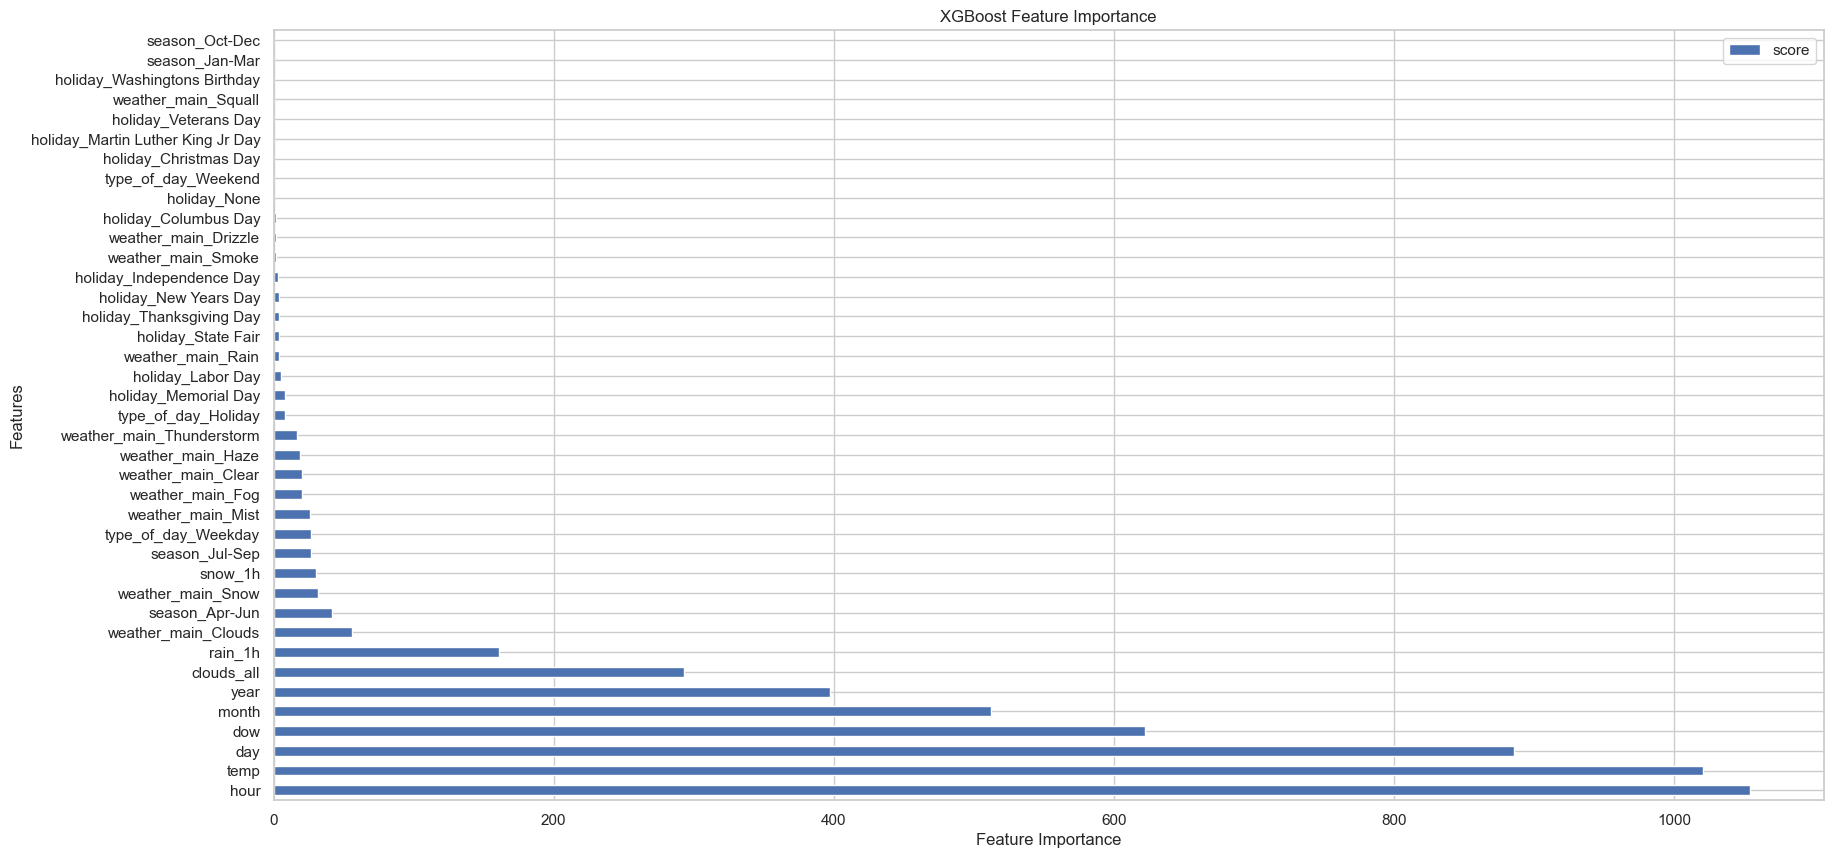

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


# Encode categorical columns (one-hot encoding)
encoder = OneHotEncoder()
categorical_columns = ['type_of_day', 'holiday', 'season']  # Add other categorical columns as needed
odf1_encoded = pd.get_dummies(odf1, columns=categorical_columns)

# Separate features and target variable
X = odf1_encoded.drop(['traffic_volume'], axis=1)
y = odf1_encoded['traffic_volume']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Get feature importance
feature_importance = xgb_model.get_booster().get_score(importance_type='weight')

# Define the keys you are interested in
keys = X.columns

# Extract values based on keys
values = [feature_importance.get(key, 0) for key in keys]

# Create a DataFrame for plotting
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=False)

# Plotting feature importance
plt.figure(figsize=(20, 10))
data.nlargest(40, columns="score").plot(kind='barh', figsize=(20, 10))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()


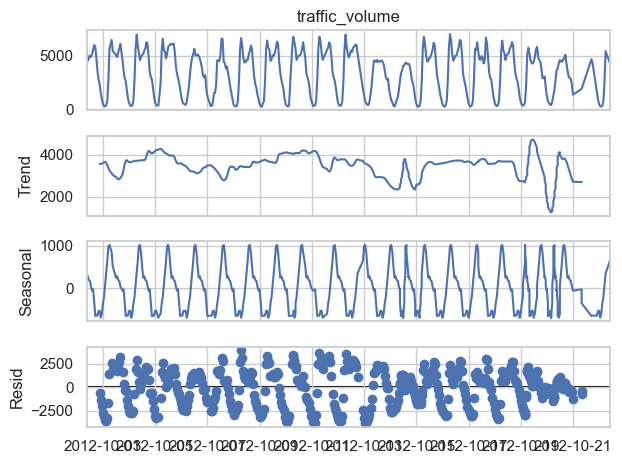

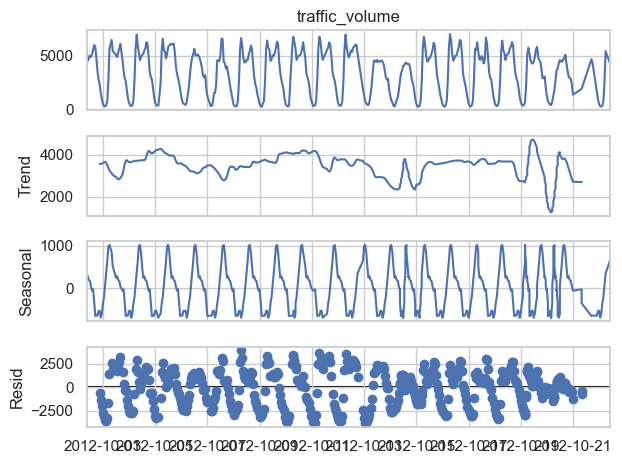

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose


traffic_df.set_index('date_time', inplace=True)

# Select the first 500 hours
data_subset = traffic_df['traffic_volume'].iloc[:500]

# Perform seasonal decomposition
result = seasonal_decompose(x=data_subset, period=24, model='additive')

# Plot the decomposition
result.plot()

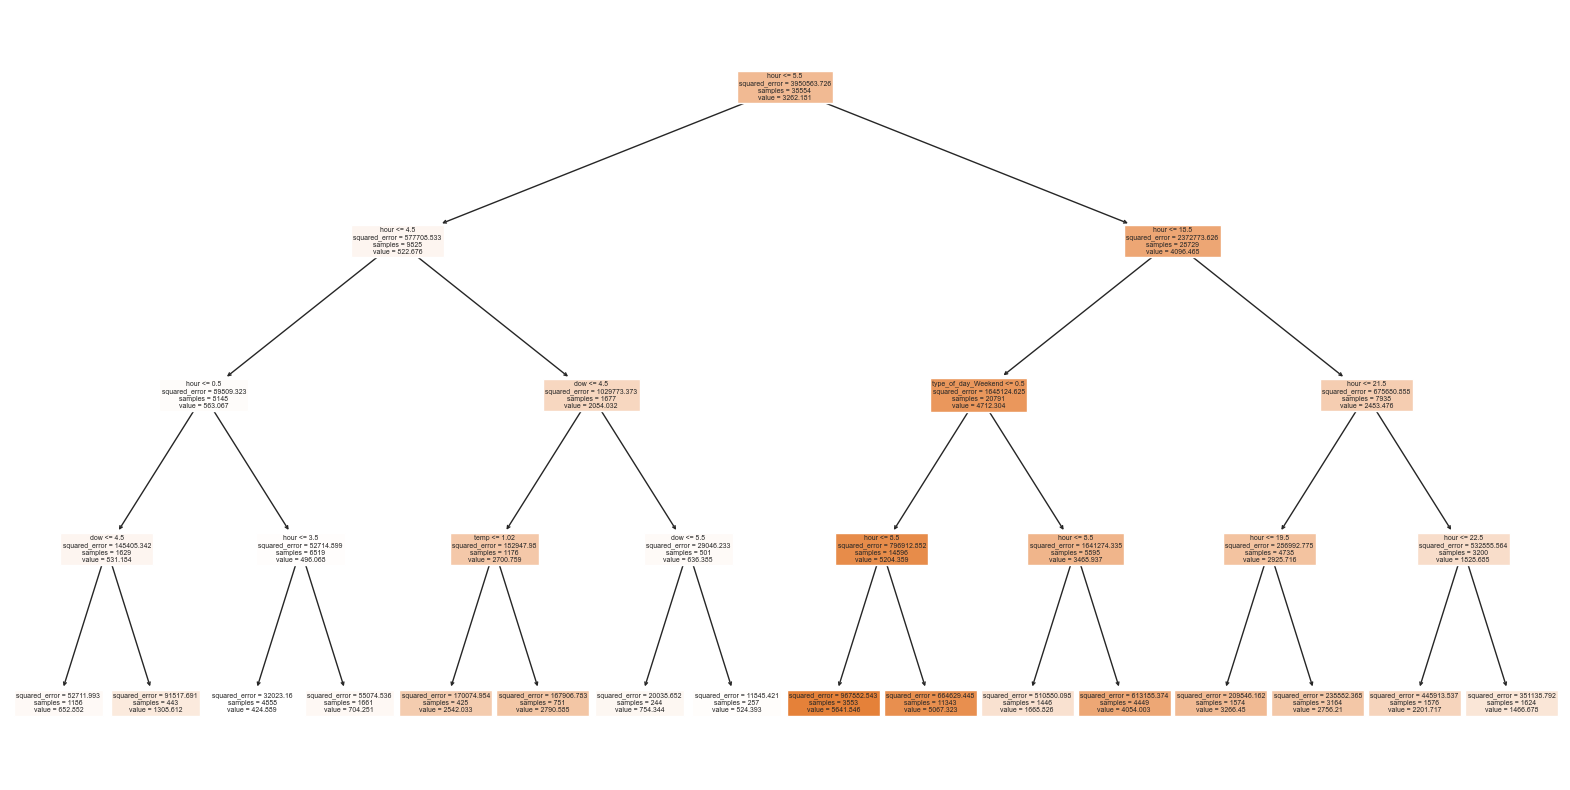

In [56]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree Regressor
fitted_dt_surrogate = DecisionTreeRegressor(max_depth=4, random_state=42)
fitted_dt_surrogate.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(fitted_dt_surrogate, filled=True, feature_names=X_train.columns.tolist(), class_names=["Class 0", "Class 1"])
plt.show()
